In [1]:
# import packages
import sys
# if homepath not in sys.path:
#     sys.path.append(homepath) # add project path to PATH
import os
os.environ["USE_PYGEOS"] = "0"  # pygeos/shapely2.0/osmnx conflict solving
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import yaml
import contextily as cx

In [2]:
# make subfolder for plots

os.makedirs("../results/plots/", exist_ok=True)

# load data and configs

configs = yaml.load(open("../config.yml"), Loader = yaml.FullLoader)
colors = yaml.load(open("../colors.yml"), Loader=yaml.FullLoader)
proj_crs = configs["proj_crs"]

with open("../results/stats/stats_studyarea.json") as opened_file:
    stats_studyarea = json.load(opened_file)

with open("../results/stats/stats_evaluation.json") as opened_file:
    stats_evaluation = json.load(opened_file)

with open("../results/stats/stats_network.json") as opened_file:
    stats_network = json.load(opened_file)

muni = gpd.read_file("../data/raw/municipality_boundaries/muni_boundary.gpkg")

In [3]:
# to plot with python instead of qgis, convert rgb to hex
colors_rgb = colors.copy()
for k, v in colors_rgb.items():
    colors[k] = '#%02x%02x%02x' % tuple([int(n) for n in v.split(",")])
colors

{'agriculture': '#cdba88',
 'bad': '#aa0114',
 'culture': '#5655d3',
 'nature': '#008000',
 'sommerhus': '#ffa500',
 'facilities': '#ffba00',
 'facilities_outside': '#ffeab1',
 'service': '#c100ff',
 'service_outside': '#f3cdff',
 'pois': '#004aff',
 'pois_outside': '#97b5ff'}

In [4]:
### RESULTS DATA 

# define paths

filenames = os.listdir("../results/data/")

path = "../results/data/"

agri_file = [f for f in filenames if f.startswith("agricultural_network") and f.endswith(".gpkg")][0]
bad_file = [f for f in filenames if f.startswith("bad_network") and f.endswith(".gpkg")][0]
culture_file = [f for f in filenames if f.startswith("agricultural_network") and f.endswith(".gpkg")][0]
nature_file = [f for f in filenames if f.startswith("nature_network") and f.endswith(".gpkg")][0]
# summer_file = [f for f in filenames if f.startswith("summer_network") and f.endswith(".gpkg")][0]

facilities_within_file = [f for f in filenames if f.startswith("facilities_within") and f.endswith(".gpkg")][0]
facilities_outside_file = [f for f in filenames if f.startswith("facilities_outside") and f.endswith(".gpkg")][0]
pois_within_file = [f for f in filenames if f.startswith("pois_within") and f.endswith(".gpkg")][0]
pois_outside_file = [f for f in filenames if f.startswith("pois_outside") and f.endswith(".gpkg")][0]
service_within_file = [f for f in filenames if f.startswith("service_within") and f.endswith(".gpkg")][0]
service_outside_file = [f for f in filenames if f.startswith("service_outside") and f.endswith(".gpkg")][0]

segments_file = "segments_slope.gpkg"

# read in

agriculture = gpd.read_file(path + agri_file)
bad = gpd.read_file(path + bad_file)
culture = gpd.read_file(path + culture_file)
nature = gpd.read_file(path + nature_file)
# summer = gpd.read_file(path + summer_file)

facilities_within = gpd.read_file(path + facilities_within_file)
facilities_outside = gpd.read_file(path + facilities_outside_file)
pois_within = gpd.read_file(path + pois_within_file)
pois_outside = gpd.read_file(path + pois_outside_file)
service_within = gpd.read_file(path + service_within_file)
service_outside = gpd.read_file(path + service_outside_file)

segments = gpd.read_file(path + segments_file)

### NETWORK DATA

# paths

path = "../data/processed/workflow_steps/"
edge_file = "network_edges_no_parallel.gpkg"
node_file = "nodes_edges_parallel.gpkg"

# read in

edges = gpd.read_file(path + edge_file)
nodes = gpd.read_file(path + node_file)

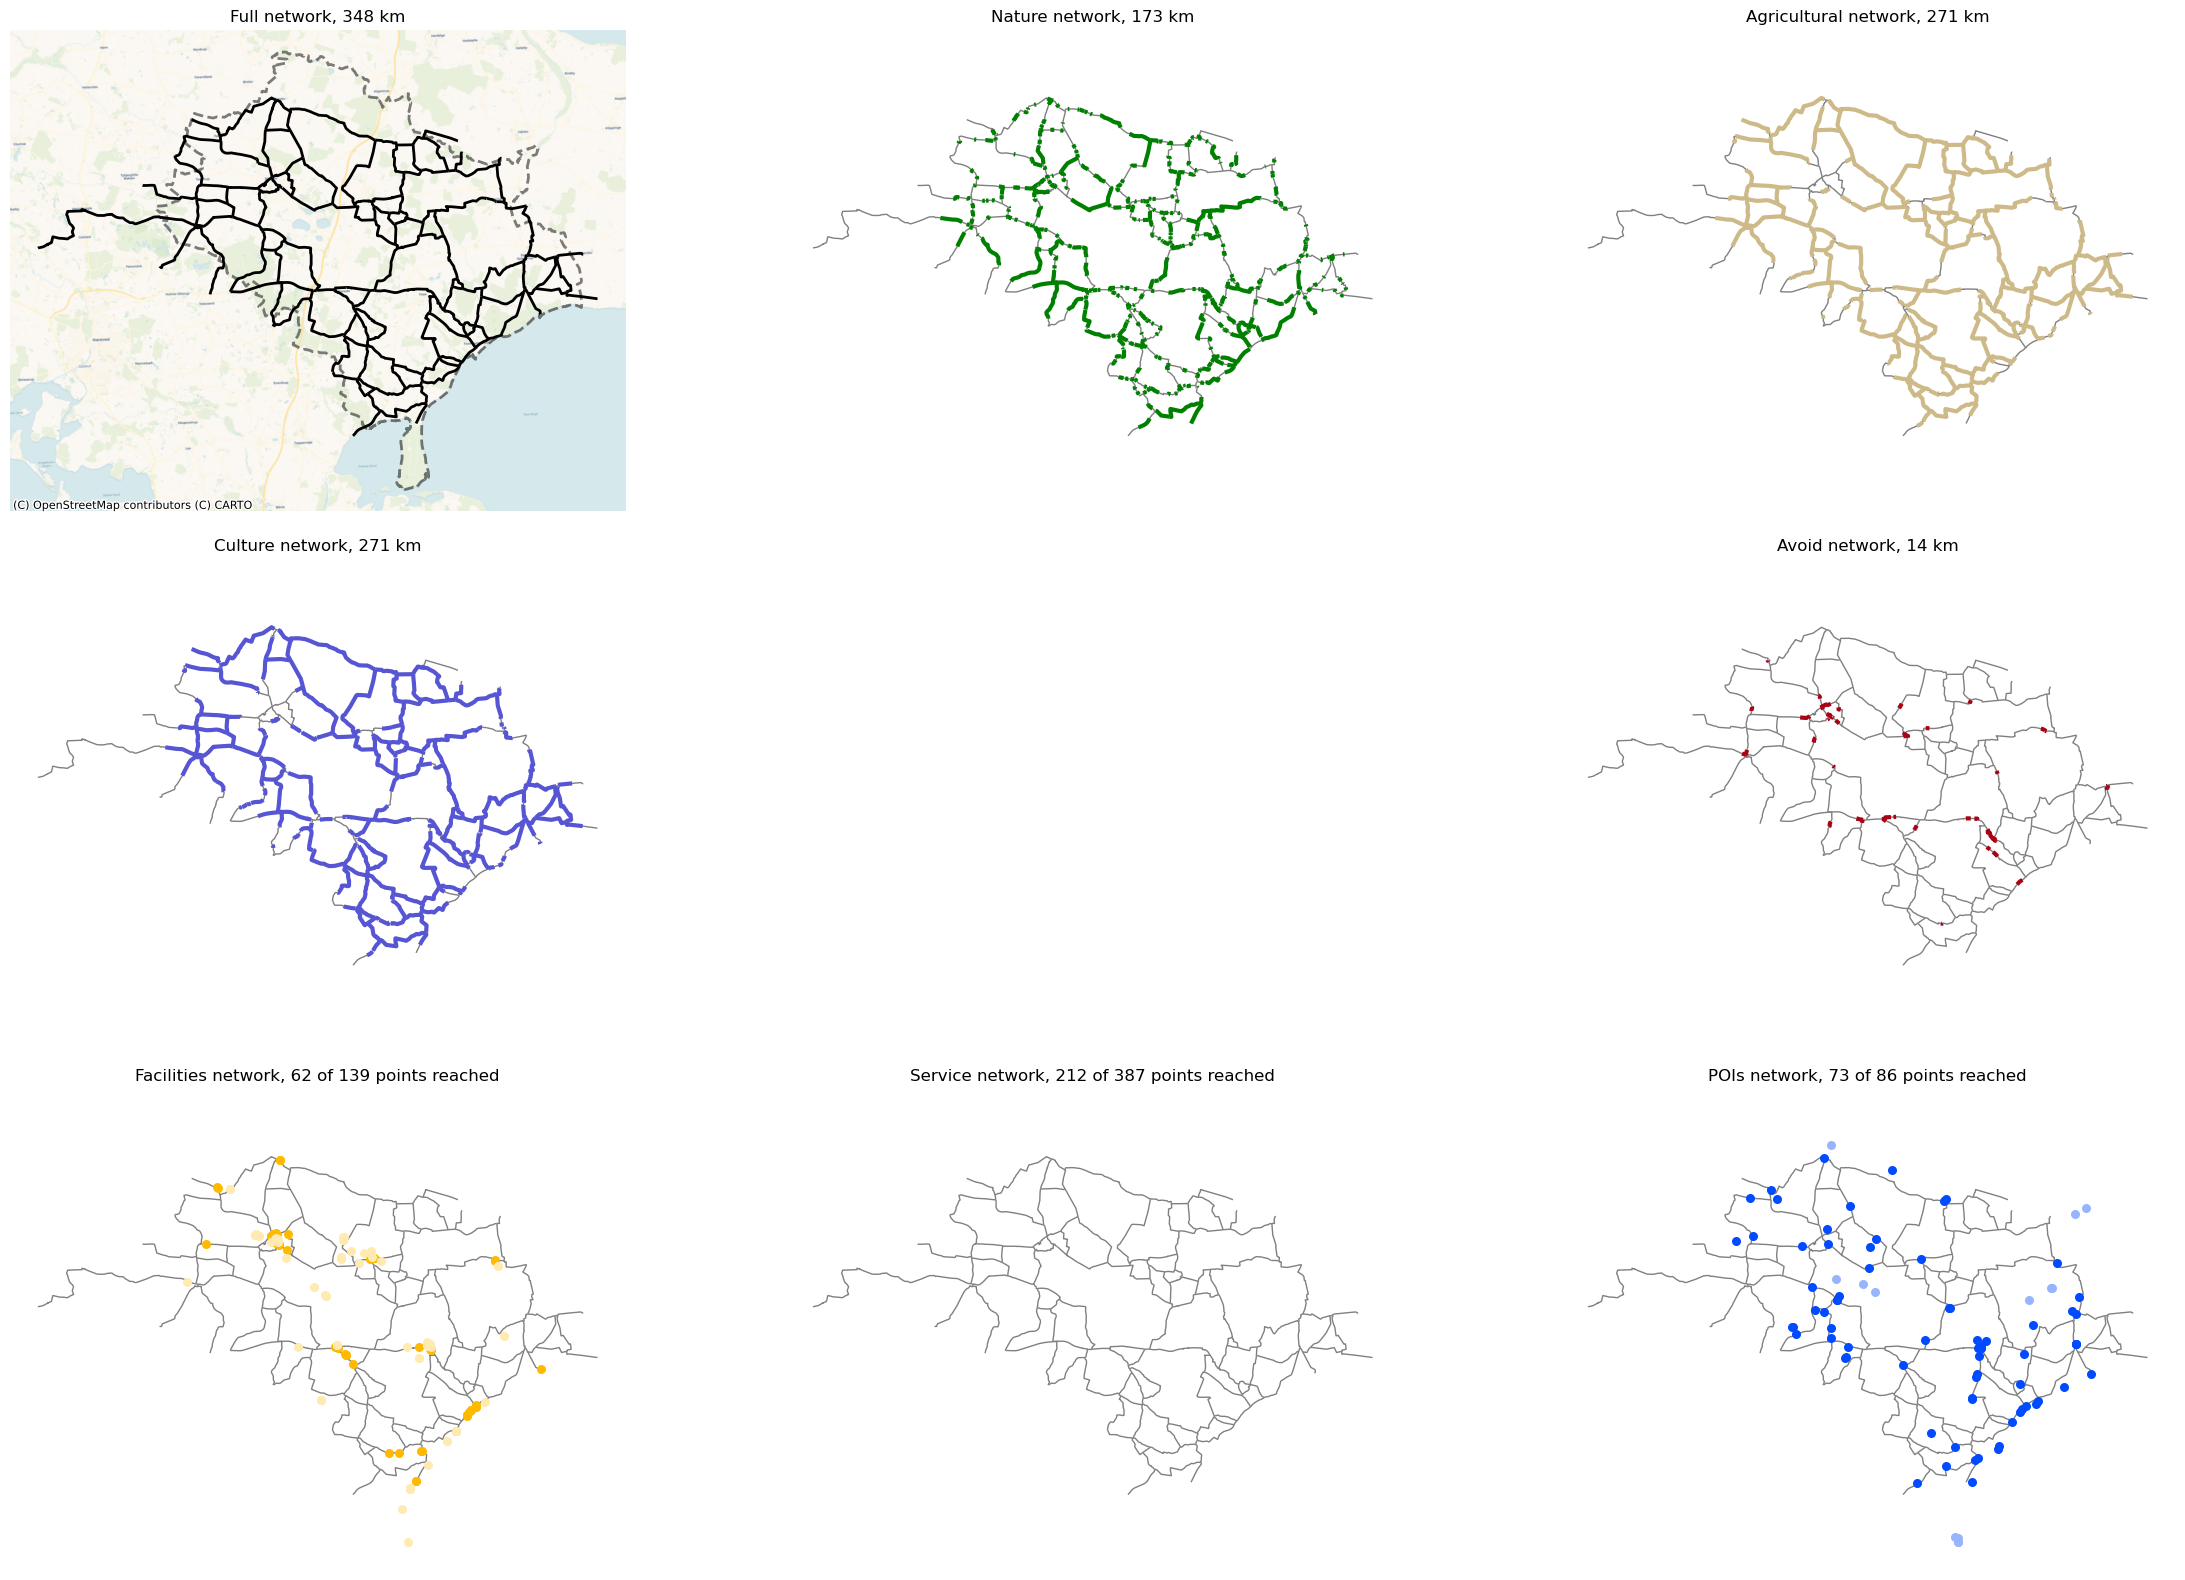

In [5]:
# define parameters for all subplots
my_markersize = 30
my_linewidth = 3

# initiate plot
fig, ax = plt.subplots(3,3, figsize = (30,20), sharex=True, sharey=True)

# full network
i = (0,0)
edges.plot(
    ax=ax[i], 
    linewidth = 3,
    zorder = 1,
    color = "black",
    lw = 2
    )
muni[muni["kommunekode"].isin(configs["municipalities"])].to_crs(proj_crs).boundary.plot(
    ax = ax[i],
    alpha = 0.5, 
    linewidth = 2,
    color = "black",
    linestyle = "--",
    zorder = 2
    )
cx.add_basemap(ax=ax[i], crs = proj_crs, source = cx.providers.CartoDB.Voyager, zorder = 0)
ax[i].set_axis_off()
length = round(edges.length.sum()/1000)
ax[i].set_title(f"Full network, {length} km")

# nature network
i = (0,1)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
nature.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["nature"],
    linewidth = my_linewidth
    )
ax[i].set_axis_off()
length = round(nature.length.sum()/1000)
ax[i].set_title(f"Nature network, {length} km")

# agriculture network
i = (0,2)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
agriculture.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["agriculture"],
    linewidth = my_linewidth
    )
ax[i].set_axis_off()
length = round(agriculture.length.sum()/1000)
ax[i].set_title(f"Agricultural network, {length} km")

# culture network
i = (1,0)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
culture.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["culture"],
    linewidth = my_linewidth
    )
ax[i].set_axis_off()
length = round(culture.length.sum()/1000)
ax[i].set_title(f"Culture network, {length} km")

# INSERT summer house plot here (IF summer house data is available for the region)
i = (1,1)
ax[i].set_axis_off()

# avoid network
i = (1,2)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
bad.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["bad"],
    linewidth = my_linewidth,
    )
ax[i].set_axis_off()
length = round(bad.length.sum()/1000)
ax[i].set_title(f"Avoid network, {length} km")

# facilities
i = (2,0)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
facilities_within.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["facilities"],
    markersize = my_markersize
    )
facilities_outside.plot(
    ax=ax[i], 
    zorder = 2, 
    color = colors["facilities_outside"],
    markersize = my_markersize
    )
ax[i].set_axis_off()
reached = len(facilities_within)
total = len(facilities_within) + len(facilities_outside)
ax[i].set_title(f"Facilities network, {reached} of {total} points reached")

# service
i = (2,1)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
service_within.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["service"],
    markersize = my_markersize
    )
service_outside.plot(
    ax=ax[i], 
    zorder = 2, 
    color = colors["service_outside"],
    markersize = my_markersize
    )
ax[i].set_axis_off()
reached = len(service_within)
total = len(service_within) + len(service_outside)
ax[i].set_title(f"Service network, {reached} of {total} points reached")

# pois
i = (2,2)
edges.plot(
    ax=ax[i], 
    zorder = 0,
    color = "grey",
    linewidth = 1,
    linestyle = "-"
    )
pois_within.plot(
    ax=ax[i], 
    zorder = 1, 
    color = colors["pois"],
    markersize = my_markersize
    )
pois_outside.plot(
    ax=ax[i], 
    zorder = 2, 
    color = colors["pois_outside"],
    markersize = my_markersize
    )
ax[i].set_axis_off()
reached = len(pois_within)
total = len(pois_within) + len(pois_outside)
ax[i].set_title(f"POIs network, {reached} of {total} points reached")

plt.subplots_adjust(wspace=0, hspace=0.1)

study_area = configs["study_area_name"]
fig.savefig(f"../results/plots/evaluation_{study_area}.png", dpi = 300)